#  🌿  Sustainable AI with Multimodal Gemini


## Overview

Sustainable AI aims to analyze documents and images related to software projects to assess potential improvements to reduce environmental impacts and carbon footprints. 

It generates comprehensive reports that highlight areas where CO2 emissions can be reduced and suggests actionable steps to enhance sustainability. This helps organizations align their projects with environmental goals while maintaining productivity and innovation.

### Objectives

Your main objective is use the multimodal capabilities of Gemini's latest Flash model to rapidly create a sustainability report for GCP software solution.

By going through this notebook, you will learn:
- Google Cloud Storage and Vertex AI Workbench.
- How to take multimodality into consideration in prompting for the Gemini Flash model.
- Leverage natural language understand and image recognition technologies from the Gemini model to extract relevant information and assess sustainability practices.

## Getting Started

### Install Vertex AI SDK for Python

In [17]:
! pip3 install --upgrade --user google-cloud-aiplatform
! pip install vertexai
! pip install IPython


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python3.11 -m pip install --upgrade pip


### Define Google Cloud project information

In [39]:
# Define project information
# PROJECT_ID = "[your-project-id]" 
PROJECT_ID = "playground-abihishek-bits" 
LOCATION = "us-central1" 
BUCKET_NAME = 'sustainable_ai'


### Import libraries

In [40]:
import vertexai
from  vertexai import generative_models
from vertexai.generative_models import GenerativeModel, Part
from google.cloud import storage

# Initialize Vertex AI
vertexai.init(project=PROJECT_ID, location=LOCATION)

## Using Gemini Flash model

The Gemini 1.5 Flash model `"gemini-1.5-flash-001"` is a multimodal model that supports adding image and video in text or chat prompts for a text response.

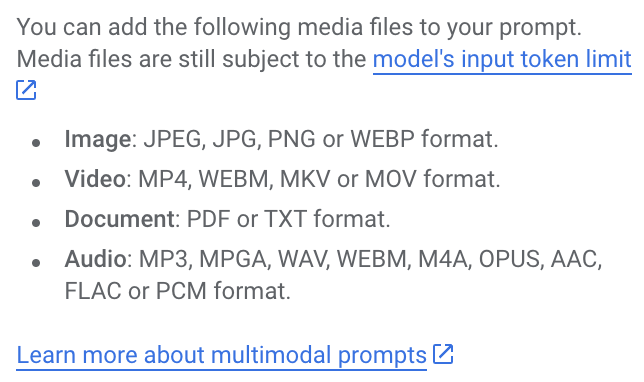

### Load Gemini 1.5 Flash model

In [41]:
model = GenerativeModel(
    "gemini-1.5-flash-001",
    
    system_instruction=["""
    You are an AI trained in sustainable technologies, specializing in suggesting the most CO2-efficient Google Cloud Platform (GCP) technical stack according to the user's specific use case. 
    In responding, consider the following steps:
    - Analyze Requirements: Based on the provided use case, analyze the computational intensity, storage needs, and potential scalability. This analysis will help in selecting the most suitable and eco-friendly GCP services.
    - Suggest GCP Services: Recommend a set of GCP services that align with the CO2 efficiency goals. Include options for computing services, storage solutions, and any relevant management tools.
    - Explain Your Choices: For each suggested service, explain why it is considered CO2-efficient in the context of the user needs. Discuss any trade-offs and suggest best practices for optimizing resource usage.
    Finally, answer the following question based on the context documentation provided. Always support your answer with clear, step-by-step reasoning that explains your choices. 

"""]
    )

## Prompt and Data

Report1: Accelerating Climate Action with AI (https://web-assets.bcg.com/72/cf/b609ac3d4ac6829bae6fa88b8329/bcg-accelerating-climate-action-with-ai-nov-2023-rev.pdf)
Report2: Accelerating Climate Action at Google and Beyond A Progress Update (https://www.gstatic.com/gumdrop/sustainability/google-2022-climate-action-progress-update.pdf)

In [43]:

# Construct the prompt for each input and its corresponding output JSON
prompt = []

context_document1 = Part.from_uri(
    mime_type="application/pdf",
    uri="gs://sustainable_ai/bcg-accelerating-climate-action-with-ai-nov-2023-rev.pdf")

context_document2 = Part.from_uri(
    mime_type="application/pdf",
    uri="gs://sustainable_ai/google-2022-climate-action-progress-update.pdf")

prompt = ["Here are the context documents:", 
          "Document 1:",context_document1, 
          "Document 2:",context_document2, 
          "User Question:"
          ]

print("--------prompt---------")
print(prompt,'\n')

print("--------Token count For Prompt---------")
print( model.count_tokens(prompt))


--------prompt---------
['Here are the context documents:', 'Document 1:', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/bcg-accelerating-climate-action-with-ai-nov-2023-rev.pdf"
}
, 'Document 2:', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/google-2022-climate-action-progress-update.pdf"
}
, 'User Question:'] 

--------Token count For Prompt---------
total_tokens: 21173
total_billable_characters: 60



## Config

In [44]:
generation_config = {
    "max_output_tokens": 8192,
    "temperature": 0.5,
    "top_p": 0.9,
}

safety_settings = {
    generative_models.HarmCategory.HARM_CATEGORY_HATE_SPEECH: generative_models.HarmBlockThreshold.BLOCK_ONLY_HIGH,
    generative_models.HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: generative_models.HarmBlockThreshold.BLOCK_ONLY_HIGH,
    generative_models.HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: generative_models.HarmBlockThreshold.BLOCK_ONLY_HIGH,
    generative_models.HarmCategory.HARM_CATEGORY_HARASSMENT: generative_models.HarmBlockThreshold.BLOCK_ONLY_HIGH,
}

## Define Model

In [45]:
# LLM Model
def generate_response(prompt):
    responses = model.generate_content(
        prompt,
        generation_config=generation_config,
        safety_settings=safety_settings,
        stream=False    
    )
    return responses

## User Query

In [46]:
user_query="I have 100s of pdf documents. I want to design a PDF to JSON extractor using Gemini. Suggest me a GCP solution stack to build this out"

prompt.append(user_query)

print("--------prompt---------")
print(prompt,'\n')

print("--------Total token count---------")
print( model.count_tokens(prompt))

--------prompt---------
['Here are the context documents:', 'Document 1:', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/bcg-accelerating-climate-action-with-ai-nov-2023-rev.pdf"
}
, 'Document 2:', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/google-2022-climate-action-progress-update.pdf"
}
, 'User Question:', 'I have 100s of pdf documents. I want to design a PDF to JSON extractor using Gemini. Suggest me a GCP solution stack to build this out'] 

--------Total token count---------
total_tokens: 21206
total_billable_characters: 168



In [47]:
# # user_query="I want to create a real estate market tracking software application. It will incorporate a dashboard, nd use of vertex AI machine learning services."

# user_doc1 = Part.from_uri(
#     mime_type="application/pdf",
#     uri="gs://sustainable_ai/finance_app_doc.pdf")


# user_doc2 = Part.from_uri(
#     mime_type="image/png",
#     uri="gs://sustainable_ai/arch_diagram.png")

# user_query = ["I want to create a real estate market tracking software application. It will incorporate a dashboard, nd use of vertex AI machine learning services.", 
#               user_doc1, 
#               user_doc2]

# prompt.extend(user_query)

# print("--------prompt---------")
# print(prompt,'\n')

# print("--------Total token count---------")
# print( model.count_tokens(prompt))


--------prompt---------
['Here are the context documents:', 'Document 1:', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/bcg-accelerating-climate-action-with-ai-nov-2023-rev.pdf"
}
, 'Document 2:', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/google-2022-climate-action-progress-update.pdf"
}
, 'User Question:', 'I have 100s of pdf documents. I want to design a PDF to JSON extractor using Gemini. Suggest me a GCP solution stack to build this out', 'I want to create a real estate market tracking software application. It will incorporate a dashboard, nd use of vertex AI machine learning services.', file_data {
  mime_type: "application/pdf"
  file_uri: "gs://sustainable_ai/finance_app_doc.pdf"
}
, file_data {
  mime_type: "image/png"
  file_uri: "gs://sustainable_ai/arch_diagram.png"
}
] 

--------Total token count---------
total_tokens: 23813
total_billable_characters: 293



## Response

In [16]:
response = generate_response(prompt)

from IPython.display import display, Markdown

# Display the text as markdown
display(Markdown(response.text))

Here's a GCP solution stack tailored for building a PDF to JSON extractor using Gemini, focusing on CO2 efficiency:

**1. Analyze Requirements:**

* **Computational Intensity:**  PDF extraction and JSON conversion can be computationally intensive, especially with large documents. 
* **Storage Needs:** You'll need to store the PDFs, intermediate data (extracted text, tables, etc.), and the final JSON output.
* **Scalability:**  The system should scale to handle hundreds of PDFs, potentially needing to process them in batches or asynchronously.

**2. Suggest GCP Services:**

* **Compute:**
    * **Cloud Run:**  A great choice for containerized applications. It's serverless, scaling automatically to handle load.  Use a lightweight container image for your extractor (e.g., based on Python or Node.js).
    * **Compute Engine:** For more control, use a preemptible instance type (cost-effective for tasks that can tolerate occasional interruptions).  This can be a good option if you need specific hardware configurations or have very long-running extraction processes.
* **Storage:**
    * **Cloud Storage:**  Store your PDFs, extracted data, and JSON output in Cloud Storage. Use the standard storage class for cost-effectiveness.
    * **Cloud SQL:** If you need a relational database for managing metadata or indexing, Cloud SQL (PostgreSQL or MySQL) is a good option. Consider using a smaller instance size for cost optimization.
* **Data Processing:**
    * **Cloud Functions:**  For smaller, event-driven tasks, like triggering extraction after a PDF is uploaded, Cloud Functions is a lightweight and scalable option.
    * **Cloud Dataflow:**  For large-scale batch processing of PDFs, Cloud Dataflow provides a robust and scalable framework. 
* **AI/ML:**
    * **Gemini API:**  Use the Gemini API to power your PDF extraction and JSON conversion logic.  Gemini's advanced language understanding capabilities will help you handle complex PDF structures and extract relevant information accurately.
* **Management:**
    * **Cloud Console:**  For monitoring and managing your resources.
    * **Stackdriver:**  For logging and monitoring your application's performance and identifying potential issues.

**3. Explain Your Choices:**

* **Cloud Run:**  Serverless nature minimizes idle compute resources, reducing CO2 emissions.  Automatic scaling ensures efficient use of resources.
* **Compute Engine (Preemptible):**  Cost-effective for tasks that can tolerate occasional interruptions. This is a good option for long-running processes where you need specific hardware configurations.
* **Cloud Storage:**  Cost-effective storage solution with various storage classes to optimize costs based on data access frequency.
* **Cloud SQL:**  Only use if you absolutely need a relational database for your application. Otherwise, consider using a NoSQL database like Cloud Firestore for better cost efficiency.
* **Cloud Functions:**  Serverless nature minimizes idle compute resources, reducing CO2 emissions.
* **Cloud Dataflow:**  A managed service that optimizes resource usage and reduces CO2 emissions compared to self-managed batch processing solutions.
* **Gemini API:**  Leverage Google's advanced AI capabilities to power your extraction logic, reducing the need for custom development and potentially improving accuracy.

**4. Best Practices for CO2 Optimization:**

* **Container Optimization:** Use a minimal container image for your extractor to reduce its size and resource consumption.
* **Resource Management:**  Monitor resource usage closely and scale down resources when not in use.
* **Data Optimization:**  Compress your data in Cloud Storage and use appropriate storage classes to minimize storage costs.
* **Asynchronous Processing:**  Process PDFs asynchronously to avoid unnecessary idle compute resources.
* **Code Optimization:**  Write efficient code to minimize the computational resources required for extraction and conversion.

**In summary, this solution stack prioritizes serverless and managed services, efficient storage options, and Google's advanced AI capabilities to minimize your carbon footprint while building a robust and scalable PDF to JSON extractor.** 


## Conclusion

This notebook showed how you can easily build a multimodal sustainable ai report using Gemini. 
You may also want to explore how you integrate real-time data tracking features, enabling continuous monitoring and adjustment of sustainability practices.